In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from scipy import linalg
import seaborn as sns

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import utils

sns.set()

/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# CCD Dataset
ccd = pd.read_csv("datasets/UCI_Credit_Card.csv", header=0)
feature_cols = [col for col in ccd.columns if col != 'ID' and col != 'default.payment.next.month']
ccd_features_df = ccd[feature_cols]
ccd_target = ccd['default.payment.next.month']

col_names = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
scaled_cols = [x for x in list(ccd_features_df) if x not in col_names]
ccd_features_df = pd.get_dummies(ccd_features_df, columns=col_names)


column_trans = make_column_transformer(
    (MinMaxScaler(), scaled_cols),
    remainder='passthrough'
)

ccd_features = column_trans.fit_transform(ccd_features_df)
ccd_features.shape

(30000, 91)

In [3]:
# FMA Dataset
tracks = utils.load('datasets/fma_metadata/tracks.csv')
features_csv = utils.load('datasets/fma_metadata/features.csv')

subset = tracks['set', 'subset'] <= 'medium'
fma_features = features_csv.loc[subset]

fma_target = tracks.loc[subset, ('track', 'genre_top')]

encoder = LabelEncoder()
fma_target_encoded = encoder.fit_transform(fma_target)

#fma_features = features_csv.loc[subset, ['mfcc', 'spectral_rolloff', 'spectral_contrast']]

scaler = MinMaxScaler()
fma_features = scaler.fit_transform(fma_features)

print(fma_features.shape)

(25000, 518)


In [38]:
g = sns.pairplot(ccd_features_df)

KeyboardInterrupt: 

## K-Means

### CCD

#### Elbow Method

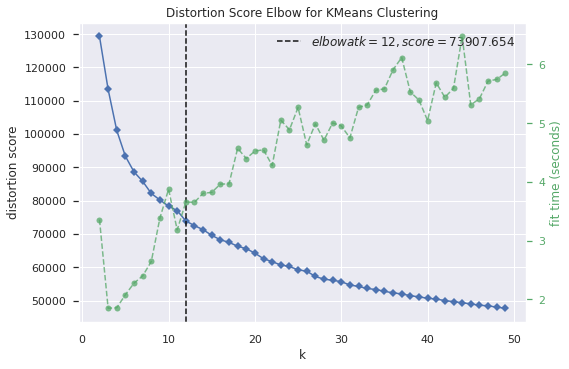

In [7]:
# Instantiate the clustering model and visualizer
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
model = KMeans(n_jobs=-1, verbose=10, random_state=23)
visualizer = KElbowVisualizer(model, k=(2, 50))

visualizer.fit(ccd_features) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

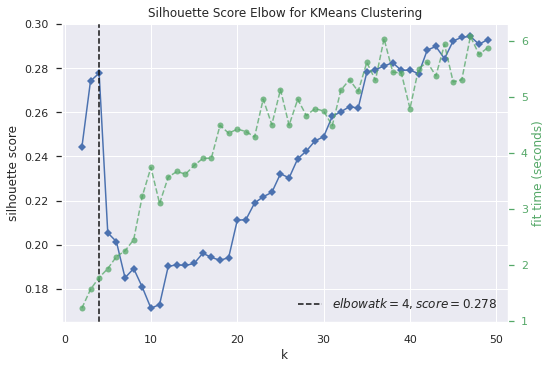

In [8]:
# Instantiate the clustering model and visualizer
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
model = KMeans(n_jobs=-1, verbose=10, random_state=23)
visualizer = KElbowVisualizer(model, metric='silhouette', k=(2, 50))

visualizer.fit(ccd_features) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [4]:
ccd_clusters = range(2, 21)
ccd_k_means_fits = []
ccd_k_means_inertia = []
ccd_k_means_silhouette = []
for i in ccd_clusters:
    model = KMeans(n_clusters=i, n_jobs=-1, verbose=10, random_state=23)
    model = model.fit(ccd_features)
    ccd_k_means_fits.append(model)
    ccd_k_means_inertia.append(model.inertia_)
    print(i, model.inertia_)
    ccd_k_means_silhouette.append(metrics.silhouette_score(ccd_features, model.labels_, metric='euclidean'))


2 129323.48459325531
3 113418.98609690194
4 101081.78701564118
5 93340.25900891935
6 88634.33694853986
7 85809.29209330567
8 82172.25778994102
9 80205.94127499447
10 78359.74853398497
11 77014.97485010633
12 73907.6604257128
13 72511.06422025152
14 71285.84714653992
15 69603.78770914745
16 68248.74200231968
17 67490.16893032391
18 66318.35339965324
19 65589.90320541199
20 64235.71767878734


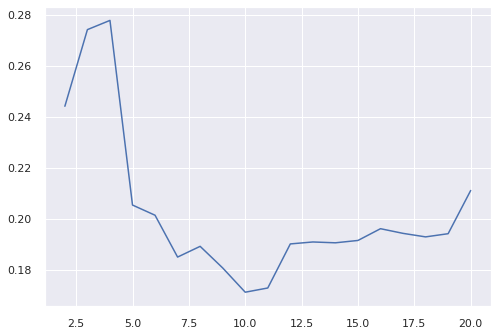

In [7]:
plt.figure()
#plt.plot(ccd_clusters, ccd_k_means_inertia, label='ssd')
plt.plot(ccd_clusters, ccd_k_means_silhouette, label='silhouette')

#### Sihouette Plot on k=3

In [48]:
# Instantiate the clustering model and visualizer
ccd_n_clusters = 4
model = KMeans(n_clusters=ccd_n_clusters, n_jobs=-1, verbose=10, random_state=23)
model = model.fit(ccd_features)
# visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# visualizer.fit(ccd_features) # Fit the data to the visualizer
# visualizer.show() # Finalize and render the figure

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=10)

#### Cluster Visualization

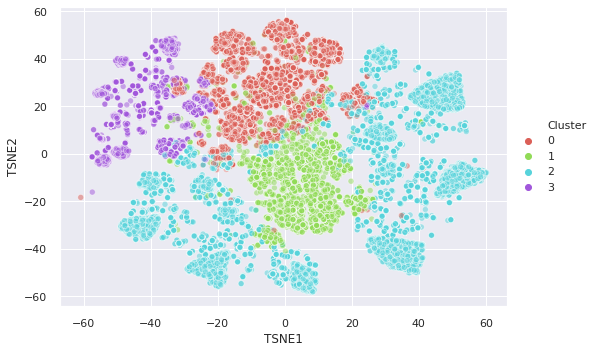

In [49]:
ccd_tsne_components = 2
ccd_tsne = TSNE(n_components=ccd_tsne_components, random_state=23, n_jobs=-1, perplexity=173)

ccd_tsne_features = ccd_tsne.fit_transform(ccd_features)

ccd_tsne_df = pd.DataFrame(data=ccd_tsne_features, columns=["TSNE%d" % i for i in range(1, ccd_tsne_components + 1)])
ccd_tsne_df['Cluster'] = model.labels_
ccd_tsne_df.head()

g = sns.scatterplot(x="TSNE1", y="TSNE2", data=ccd_tsne_df, 
                    palette=sns.color_palette("hls", ccd_n_clusters), 
                    hue='Cluster', legend='brief', alpha=0.5)
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

### FMA

#### Elbow Method

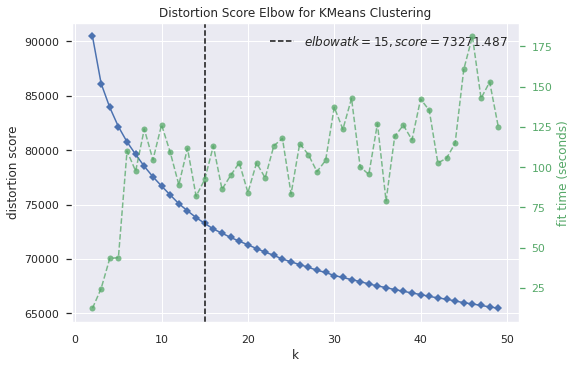

In [13]:
# Instantiate the clustering model and visualizer
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
model = KMeans(n_jobs=-1, verbose=10, random_state=23)
visualizer = KElbowVisualizer(model, k=(2, 50))

visualizer.fit(fma_features) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

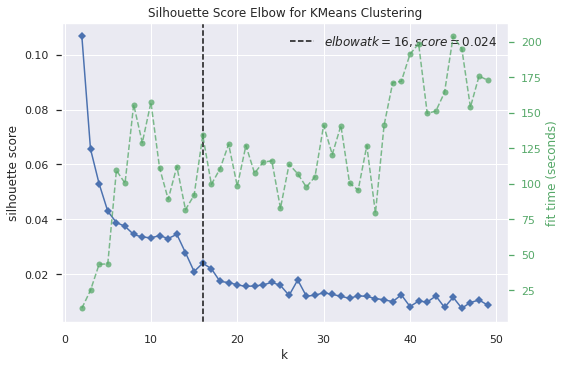

In [14]:
# Instantiate the clustering model and visualizer
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
model = KMeans(n_jobs=-1, verbose=10, random_state=23)
visualizer = KElbowVisualizer(model, metric='silhouette', k=(2, 50))

visualizer.fit(fma_features) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [10]:
fma_clusters = range(2, 21)
fma_k_means_fits = []
fma_k_means_inertia = []
fma_k_means_silhouette = []
fma_db_score = []
fma_ch_score = []
for i in fma_clusters:
    model = KMeans(n_clusters=i, n_jobs=-1, verbose=10, random_state=23)
    pred = model.fit_predict(fma_features)
    fma_k_means_fits.append(model)
    fma_k_means_inertia.append(model.inertia_)
    print(i, model.inertia_)
    fma_k_means_silhouette.append(metrics.silhouette_score(fma_features, model.labels_, metric='euclidean'))
    fma_db_score.append(metrics.davies_bouldin_score(fma_features, pred))
    fma_ch_score.append(metrics.calinski_harabasz_score(fma_features, pred))

2 90451.39285973804


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


3 86122.92800368166


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


4 83927.83163676588


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


5 82162.21278379853


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


6 80758.8668598691


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


7 79605.04912059517


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


8 78510.27906191081


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


9 77555.225066242


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


10 76701.6367939872


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


11 75882.85493215002


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


12 75081.81758003526


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


13 74426.13873024432


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


14 73803.72700319412


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


15 73271.48715428445


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


16 72754.9361672164


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


17 72368.81378644129


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


18 71979.81245598446


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


19 71633.57953913836


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


20 71302.36247362194


/home/clement/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


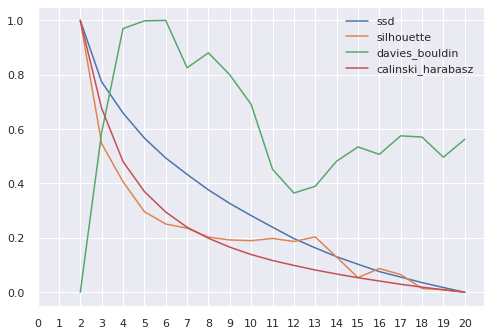

In [23]:
scaler = MinMaxScaler()
plt.figure()
plt.plot(ccd_clusters, scaler.fit_transform(np.reshape(fma_k_means_inertia,(-1, 1))), label='ssd')
plt.plot(ccd_clusters, scaler.fit_transform(np.reshape(fma_k_means_silhouette,(-1, 1))), label='silhouette')
plt.plot(ccd_clusters, scaler.fit_transform(np.reshape(fma_db_score,(-1, 1))), label='davies_bouldin')
plt.plot(ccd_clusters, scaler.fit_transform(np.reshape(fma_ch_score,(-1, 1))), label='calinski_harabasz')
plt.xticks(range(21))
plt.legend()
plt.show()

In [26]:
# Instantiate the clustering model and visualizer
fma_n_clusters = 2
fma_kmeans_model = KMeans(n_clusters=fma_n_clusters, n_jobs=-1, verbose=10, random_state=23)
fma_kmeans_model = fma_kmeans_model.fit(fma_features)
# visualizer = SilhouetteVisualizer(fma_kmeans_model, colors='yellowbrick')

# visualizer.fit(fma_features) # Fit the data to the visualizer
# visualizer.show() # Finalize and render the figure

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=10)

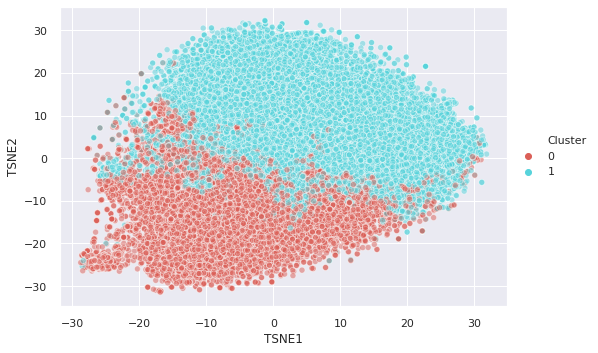

In [27]:
fma_tsne_components = 2
fma_tsne = TSNE(n_components=fma_tsne_components, random_state=23, n_jobs=-1, perplexity=158)
fma_tsne_features = fma_tsne.fit_transform(fma_features)

fma_tsne_df = pd.DataFrame(data=fma_tsne_features, columns=["TSNE%d" % i for i in range(1, fma_tsne_components + 1)])
fma_tsne_df['Cluster'] = fma_kmeans_model.labels_
fma_tsne_df.head()

g = sns.scatterplot(x="TSNE1", y="TSNE2", data=fma_tsne_df, 
                    palette=sns.color_palette("hls", fma_n_clusters), 
                    hue='Cluster', legend='brief', alpha=0.5)
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

## EM

### CCD

In [18]:
#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html
print(__doc__)

n_components_range = range(1, 50)
cv_types = ['spherical', 'tied', 'diag', 'full']
ccd_bics = {cv: [] for cv in cv_types}
ccd_aics = {cv: [] for cv in cv_types}
ccd_gmm_fits = {cv: [] for cv in cv_types}

for cv_type in cv_types:
    print(cv_type)
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        ccd_gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        fit = ccd_gmm.fit(ccd_features)
        ccd_gmm_fits[cv_type].append(fit)
        ccd_bics[cv_type].append(ccd_gmm.bic(ccd_features))
        ccd_aics[cv_type].append(ccd_gmm.aic(ccd_features))

Automatically created module for IPython interactive environment
spherical
tied
diag
full


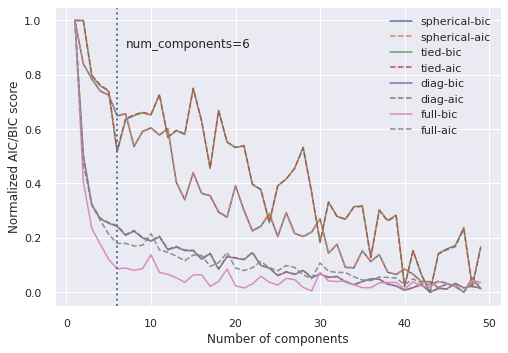

In [34]:
# Plot the AIC/BIC scores
plt.figure()

scaler = MinMaxScaler()
for cv in cv_types:
    bic_scores = scaler.fit_transform(np.reshape(ccd_bics[cv], (-1, 1)))
    plt.plot(n_components_range, bic_scores, label=cv+'-bic')
    aic_scores = scaler.fit_transform(np.reshape(ccd_aics[cv], (-1, 1)))
    plt.plot(n_components_range, aic_scores, label=cv+'-aic', linestyle='dashed')

plt.xlabel('Number of components')
plt.ylabel('Normalized AIC/BIC score')
plt.axvline(6, linestyle=':', linewidth = 2)
plt.text(7, 0.9, 'num_components=6')
plt.legend()
plt.show()

### FMA

In [36]:
#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html
print(__doc__)

n_components_range = range(1, 50)
cv_types = ['full']
fma_bics = {cv: [] for cv in cv_types}
fma_aics = {cv: [] for cv in cv_types}
fma_gmm_fits = {cv: [] for cv in cv_types}

for cv_type in cv_types:
    print(cv_type)
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        fma_gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        fit = fma_gmm.fit(fma_features)
        fma_gmm_fits[cv_type].append(fit)
        fma_bics[cv_type].append(fma_gmm.bic(fma_features))
        fma_aics[cv_type].append(fma_gmm.aic(fma_features))

Automatically created module for IPython interactive environment
full


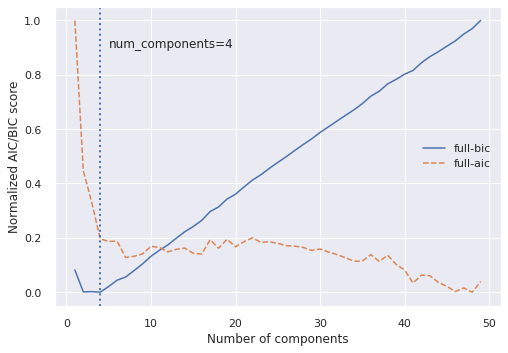

In [40]:
# Plot the AIC/BIC scores
plt.figure()

scaler = MinMaxScaler()
for cv in cv_types:
    bic_scores = scaler.fit_transform(np.reshape(fma_bics[cv], (-1, 1)))
    plt.plot(n_components_range, bic_scores, label=cv+'-bic')
    aic_scores = scaler.fit_transform(np.reshape(fma_aics[cv], (-1, 1)))
    plt.plot(n_components_range, aic_scores, label=cv+'-aic', linestyle='dashed')

plt.xlabel('Number of components')
plt.ylabel('Normalized AIC/BIC score')
plt.axvline(4, linestyle=':', linewidth = 2)
plt.text(5, 0.9, 'num_components=4')
#plt.xticks(range(10))
plt.legend()
plt.show()

In [35]:
best_fma_gmm_fit = GaussianMixture(n_components=4, random_state=23).fit(fma_features)
print(best_fma_gmm_fit)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=23, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


# Part 5

In [43]:
kmeans_features = fma_kmeans_model.labels_.reshape(-1, 1)
gmm_features = best_fma_gmm_fit.predict(fma_features).reshape(-1, 1)


clustering_labels = {'kmeans': np.append(fma_features, kmeans_features, 1), 'em': np.append(fma_features, gmm_features, 1)}

In [48]:
clustering_labels['em'].shape

(25000, 519)

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
fma_data = {}
fma_nn_estimators = {}
for name, features in clustering_labels.items():
    x_train, x_test, y_train, y_test = train_test_split(features, fma_target, test_size=0.2, stratify=fma_target, random_state=28)
    fma_data[name] =(x_train, x_test, y_train, y_test)
    
    tuned_parameters = [{'batch_size': [16, 32, 64, 128], 'solver': ['adam'], 
                     'hidden_layer_sizes': [(64), (128), (256)], 
                     'learning_rate_init': [0.1, 0.01, 0.001],
                     'alpha': [0.0001, 0.001]}]
                     
    nn_grid_cv = GridSearchCV(MLPClassifier(early_stopping=True), 
                              tuned_parameters, 
                              scoring='f1_macro', 
                              verbose=10,
                              n_jobs=-1,
                              cv=3,
                              return_train_score=True)
    nn_grid_cv.fit(x_train, y_train)
    fma_nn_estimators[name] = nn_grid_cv.best_estimator_
    print (nn_grid_cv.best_score_, nn_grid_cv.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 207 out of 216 | elapsed: 27.3min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 28.0min finished


0.40917140852364214 {'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': 256, 'learning_rate_init': 0.001, 'solver': 'adam'}
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 207 out of 216 | elapsed: 25.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 26.0min finished


0.4061804760856445 {'alpha': 0.0001, 'batch_size': 16, 'hidden_layer_sizes': 128, 'learning_rate_init': 0.001, 'solver': 'adam'}


In [52]:
from sklearn.metrics import classification_report
for name, model in fma_nn_estimators.items():
    x_train, x_test, y_train, y_test = fma_data[name]
    nn_pred = model.predict(x_test)
    print(classification_report(y_test, nn_pred, digits=4))

                     precision    recall  f1-score   support

              Blues     0.0000    0.0000    0.0000        15
          Classical     0.6478    0.8306    0.7279       124
            Country     0.0000    0.0000    0.0000        35
     Easy Listening     0.0000    0.0000    0.0000         4
         Electronic     0.5950    0.8432    0.6977      1263
       Experimental     0.5179    0.3222    0.3973       450
               Folk     0.6056    0.6414    0.6230       304
            Hip-Hop     0.7518    0.4818    0.5873       440
       Instrumental     0.3426    0.4556    0.3911       270
      International     0.5548    0.4216    0.4791       204
               Jazz     0.4706    0.2078    0.2883        77
Old-Time / Historic     0.9691    0.9216    0.9447       102
                Pop     0.5000    0.0211    0.0405       237
               Rock     0.7649    0.8128    0.7881      1421
           Soul-RnB     0.0000    0.0000    0.0000        31
             Spoken    

/home/clement/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clement/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
